In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

Эпоха 1, Потери: 0.2937
Эпоха 2, Потери: 0.0837
Эпоха 3, Потери: 0.0623


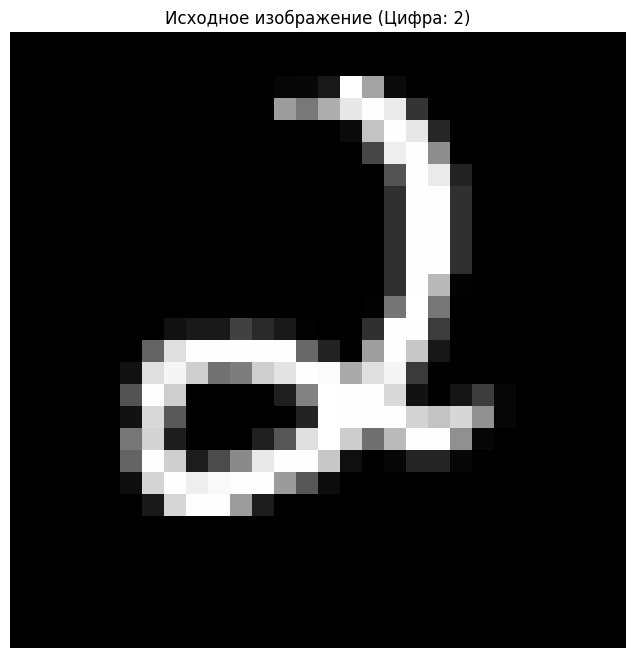

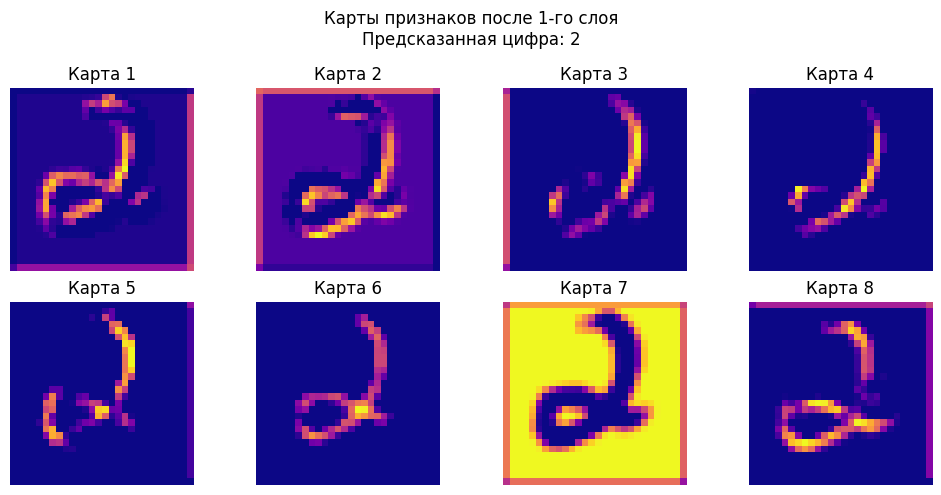

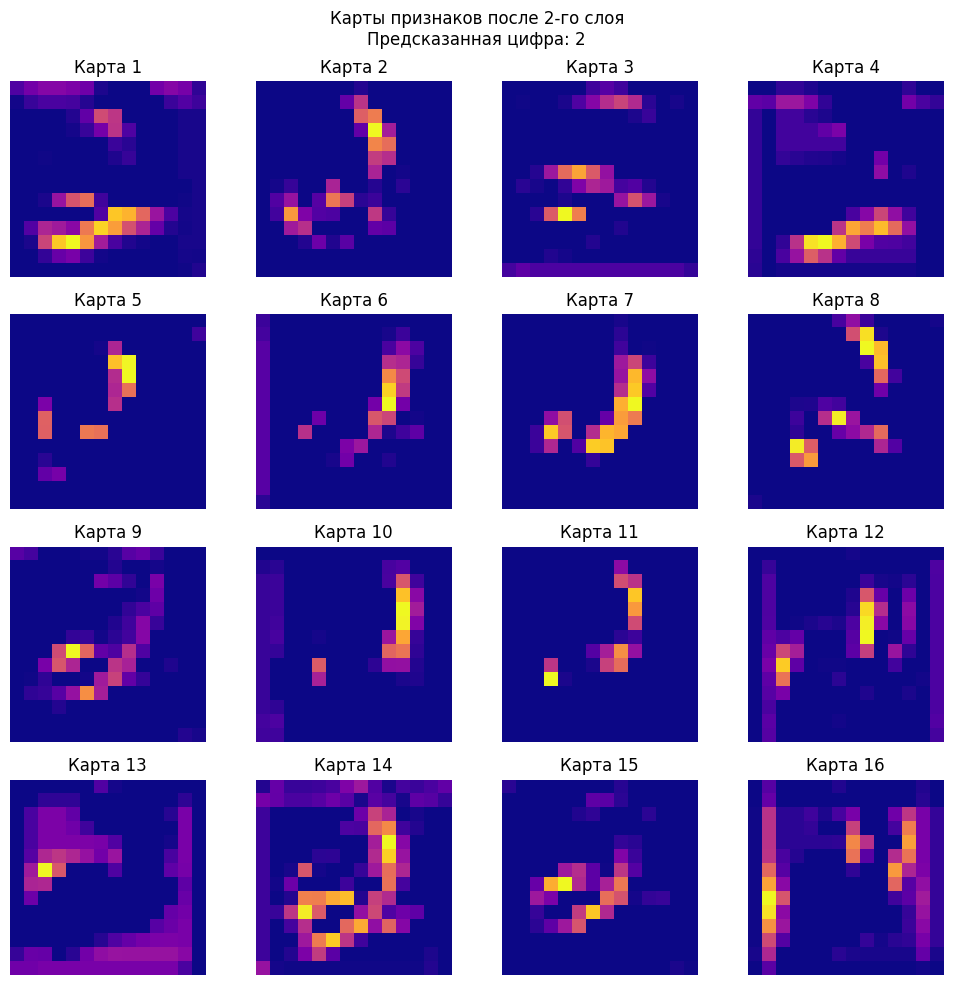

Размер вектора после Flatten: torch.Size([784])
Модель предсказала: 2
Тест жиынтығындағы дәлдік (Accuracy): 98.37%


In [4]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNIST
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=data_transform)
training_dataloader = torch.utils.data.DataLoader(training_dataset, batch_size=64, shuffle=True)

testing_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=data_transform)
testing_dataloader = torch.utils.data.DataLoader(testing_dataset, batch_size=1, shuffle=True)

# нейронка
class MnistClassifier(nn.Module):
    def __init__(self):
        super(MnistClassifier, self).__init__()
        self.first_conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.second_conv = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.output_layer = nn.Linear(16 * 7 * 7, 10)

    def forward(self, input_tensor):
        x = torch.relu(self.first_conv(input_tensor))
        fmap_first = x.clone().detach()

        x = self.maxpool(x)

        x = torch.relu(self.second_conv(x))
        fmap_second = x.clone().detach()

        x = self.maxpool(x)

        x = x.view(x.size(0), -1)
        flat_vector = x.clone().detach()

        x = self.output_layer(x)

        return x, fmap_first, fmap_second, flat_vector

neural_net = MnistClassifier()
loss_function = nn.CrossEntropyLoss()
optimizer_instance = optim.Adam(neural_net.parameters(), lr=0.001)

# Обучение
num_epochs = 3
for epoch in range(num_epochs):
    total_loss = 0.0
    for batch_images, batch_labels in training_dataloader:
        optimizer_instance.zero_grad()
        predictions, _, _, _ = neural_net(batch_images)
        loss = loss_function(predictions, batch_labels)
        loss.backward()
        optimizer_instance.step()
        total_loss += loss.item()
    
    print(f"Эпоха {epoch+1}, Потери: {total_loss/len(training_dataloader):.4f}")


torch.save(neural_net.state_dict(), "mnist_classifier.pth")

neural_net.eval()
test_sample, true_digit = next(iter(testing_dataloader))

with torch.no_grad():
    result, features1, features2, flattened_vec = neural_net(test_sample)

predicted_digit = torch.argmax(result, dim=1).item()

def denormalize_image(tensor):
    return tensor * 0.5 + 0.5

# исходное изображение
plt.figure(figsize=(8, 8))
plt.imshow(denormalize_image(test_sample).squeeze().cpu().numpy(), cmap="gray")
plt.title(f"Исходное изображение (Цифра: {true_digit.item()})")
plt.axis("off")
plt.show()

# первый слой карты
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for idx, ax in enumerate(axes.flat):
    ax.imshow(features1[0, idx].cpu().numpy(), cmap="plasma")
    ax.set_title(f"Карта {idx+1}")
    ax.axis("off")
plt.suptitle(f"Карты признаков после 1-го слоя\nПредсказанная цифра: {predicted_digit}")
plt.tight_layout()
plt.show()

# второй слой карты
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for idx, ax in enumerate(axes.flat):
    ax.imshow(features2[0, idx].cpu().numpy(), cmap="plasma")
    ax.set_title(f"Карта {idx+1}")
    ax.axis("off")
plt.suptitle(f"Карты признаков после 2-го слоя\nПредсказанная цифра: {predicted_digit}")
plt.tight_layout()
plt.show()

print(f"Размер вектора после Flatten: {flattened_vec[0].shape}")
print(f"Модель предсказала: {predicted_digit}")

# точность модели
correct = 0
total = 0

neural_net.eval()
with torch.no_grad():
    for images, labels in testing_dataloader:
        outputs, _, _, _ = neural_net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Тест жиынтығындағы дәлдік (Accuracy): {accuracy:.2f}%")

In [ ]:
class MnistClassifier(nn.Module):
    def _init_(self):
        super(MnistClassifier, self)._init_()
        self.first_conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.second_conv = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.output_layer = nn.Linear(16 * 7 * 7, 10)

    def forward(self, input_tensor):
        x = torch.relu(self.first_conv(input_tensor))
        fmap_first = x.clone().detach()

        x = self.maxpool(x)

        x = torch.relu(self.second_conv(x))
        fmap_second = x.clone().detach()

        x = self.maxpool(x)

        x = x.view(x.size(0), -1)
        flat_vector = x.clone().detach()

        x = self.output_layer(x)

        return x, fmap_first, fmap_second, flat_vector